# <center> **Mini Project 2 (Group 09)** </centre>

| **Name**               | **Roll No.** | **Percentage of Contribution**  |
|------------------------|--------------|---------------------------------|
| Gauravshankar Mishra   | 23510039     | 20%                             |
| Dinesh Patel           | 23510032     | 40%                             |
| Dipak Kumar            | 23510033     | 20%                             |
| Dharam Dev             | 23510031     | 20%                             |

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import bisect


### Question:-
Study the energy structure of several model central potentials. Use the Numerov’s method.
### Exp:- 
First, let us consider a potential that deviates slightly from the Coulomb potential in the power
law,

V(r) =  $\frac{-Z}{r^(1+ε)}$


Take various values of ε = 0. 01, 0. 05, 0. 1
Note that ε = 0 corresponds to the Coulomb potential in the Hydrogen atom.

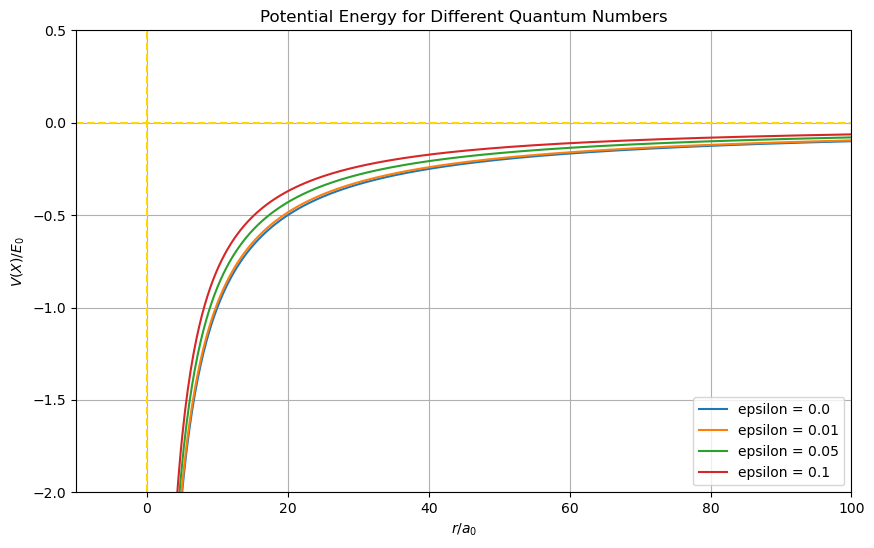

In [2]:
# Create a new figure for the plots
plt.figure(figsize=(10,6))

# Define parameters
Z = 1  # Atomic number (for hydrogen)
r_max = 100  # Maximum radial distance
r = np.linspace(1e-6, r_max, 500)  # small range is taken so that function will be measurable 

for epsilon in [0.0, 0.01, 0.05, 0.1]:
        V = -Z / r**(epsilon+1) 
        plt.plot(r, 10*V, label=f'epsilon = {epsilon}')

# Add labels and legend to the plot
plt.axvline(0, ls='--', c='gold')
plt.axhline(0, ls='--', c='gold')
plt.title('Potential Energy for Different Quantum Numbers')
plt.xlabel('$r/a_0$')
plt.ylabel('$V(X)/E_0$')
plt.legend()
plt.ylim(-2, 0.5)
plt.xlim(-10,100)
plt.grid(True)
plt.show()


#### Interpretation:
From the above graph we can interpert that as the epsilon values decreases the coulambic potential becomes more attractive.

### Qn:-   
Comment on how the use of atomic units simplifies the representation of the potential above when the TISE is a-dimensionalized.

### Exp: 

### Nondimensionalizing the Schrödinger Equation

The Schrödinger equation is given by:

$$
-\frac{{\hbar^2}}{{2m}} \frac{{d^2\psi}}{{dx^2}} + V(x)\psi = E\psi \quad (1)
$$

where:
- $\psi(x)$ is the wave function,
- $E$ is the total energy of the system,
- $V(x)$ is the potential energy,
- $\hbar$ is the reduced Planck constant, and
- $m$ is the mass of the particle.

To nondimensionalize the equation, we introduce dimensionless variables:

- $x' = x/L$,
- $\psi'(x') = \psi(x)$,
- $E' = E/E_0$,
- $V'(x') = V(x)/E_0$.



Substituting these into Equation (1), we get:

$$
-\frac{{\hbar^2}}{{2mE_0L^2}} \frac{{d^2\psi'}}{{dx'^2}} + V'(x')\psi' = E'\psi' \quad (2)
$$

We can simplify this further by choosing $E_0$ such that:

$$
\frac{{\hbar^2}}{{mL^2}} = E_0
$$

This gives us the nondimensionalized Schrödinger equation:

$$
-\frac{1}{2}\frac{{d^2\psi'}}{{dx'^2}} + V'(x')\psi' = E'\psi'
$$

In atomic units, where $\hbar = m_e = e = 1$, the characteristic length $L$ becomes the Bohr radius ($a_0$), and the characteristic energy $E_0$ becomes the Hartree energy ($E_h$). Therefore, the nondimensionalized Schrödinger equation in atomic units is:

$$
-\frac{1}{2}\frac{{d^2\psi'}}{{dx'^2}} + V'(x')\psi' = E'\psi'
$$

This form is more convenient for numerical solutions because it removes large constants from the equation, making it easier to handle on a computer.

### Nondimensionalizing the Hydrogen Atom Problem

For the hydrogen atom, the potential energy $V(r)$ is given by the Coulomb potential:

$$
V(r) = -\frac{e^2}{4\pi\epsilon_0 r}
$$

where $r$ is the distance from the proton, $e$ is the elementary charge, and $\epsilon_0$ is the permittivity of free space.

In atomic units, $e = 1$ and $4\pi\epsilon_0 = 1$, so the potential becomes:

$$
V'(r') = -\frac{1}{r'}
$$

The effective potential for the radial part of the Schrödinger equation includes the centrifugal term:

$$
V_{\text{eff}}(r') = V'(r') + \frac{l(l+1)}{2r'^2}
$$

where $l$ is the orbital quantum number.

The energy levels of the hydrogen atom are given by:

$$
E'_n = -\frac{1}{2n^2}
$$

where $n$ is the principal quantum number. These are the energy eigenvalues for the hydrogen atom problem.


### Question:- 
Compute the energy-level diagram as shown in Figure 9.11 in Wang’s textbook (reproduced below), Compare with the hydrogen atom (Z = 1), and summarise the similarities and differences and Explain why all states are higher than hydrogen except the 1s state. Explain why this (a figure similar to Figure 9.12 (reproduced below) should be helpful).
 

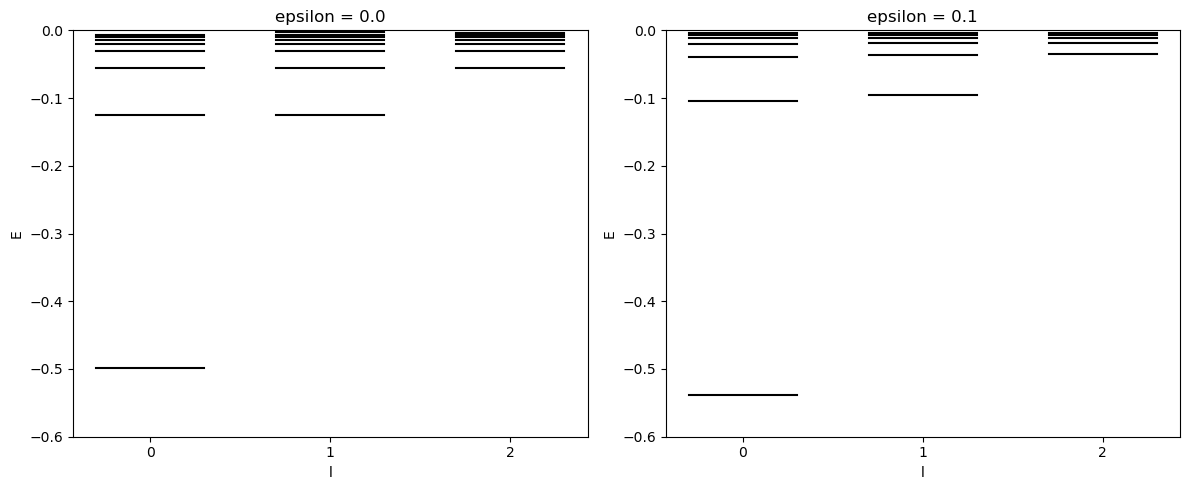

In [3]:
# Constants
xL, xR, N = 0., 120., 2200
h, mass = (xR-xL)/N, 1.0
Lmax, EL, M = 3, [], 100
Estart, dE = -0.5/np.arange(1, Lmax+1)**2-0.1, 0.001
epsilons = [0.0,0.1]

def Veff(r, epsilon):
    return (L*(L+1)/(2*mass*r*r))-1/r**(1+epsilon)

def f(r, epsilon):
    return 2*mass*(E-Veff(r, epsilon))

def numerov(f, u, n, x, h, epsilon):
    nodes, c = 0, h*h/12.
    f0, f1 = 0., f(x+h, epsilon)
    for i in range(n):
        x += h
        f2 = f(x+h, epsilon)
        u.append((2*(1-5*c*f1)*u[i+1] - (1+c*f0)*u[i])/(1+c*f2))
        f0, f1 = f1, f2
        if (u[-1]*u[-2] < 0.0): nodes += 1
    return u, nodes

def shoot(En, epsilon):
    global E
    E, c, xm = En, (h*h)/6., xL + M*h
    wfup, nup = numerov(f, [0,.1], M, xL, h, epsilon)
    wfdn, ndn = numerov(f, [0,.1], N-M, xR, -h, epsilon)
    dup = ((1+c*f(xm+h, epsilon))*wfup[-1] - (1+c*f(xm-h, epsilon))*wfup[-3])/(h+h)
    ddn = ((1+c*f(xm+h, epsilon))*wfdn[-3] - (1+c*f(xm-h, epsilon))*wfdn[-1])/(h+h)
    return dup*wfdn[-2] - wfup[-2]*ddn

fig, axs = plt.subplots(1, 2, figsize=(12,5)) 
axs = axs.flatten()  # Flatten the array for easy indexing

for idx, epsilon in enumerate(epsilons):
    EL = []
    for L in range(Lmax):
        n, E1, Ea = L+1, Estart[L], []
        while (E1 < -4*dE):
            E1 += dE
            if (shoot(E1, epsilon)*shoot(E1 + dE, epsilon) > 0): continue
            E = bisect(shoot, E1, E1 + dE, xtol=1.e-8, args=(epsilon,))
            Ea.append(E)
            wfup, nup = numerov(f, [0,.1], M-1, xL, h, epsilon)
            wfdn, ndn = numerov(f, [0,.1], N-M-1, xR, -h, epsilon)
            psix = np.concatenate((wfup[:-1], wfdn[::-1]))
            psix[M:] *= wfup[-1]/wfdn[-1]
            n += 1
#             print( 'nodes, n, l, E =', nup+ndn, n, L, E )

        EL.append(Ea)

    for L in range(Lmax):
        for i in range(len(EL[L])):
            axs[idx].plot([L-0.3, L+0.3], [EL[L][i]]*2, 'k-')
    axs[idx].set_title(f'epsilon = {epsilon}')
    axs[idx].set_xlabel('l')
    axs[idx].set_ylabel('E')
    axs[idx].set_ylim(-0.6, 0)
    axs[idx].set_xticks(range(Lmax))

plt.tight_layout()
plt.show()


### Exp:-
Above Plotation exactly matches our analytical thoughts. When the exponent of r increases from 1 to 1.1, The Potential Energy function becomes more negative as r decreases. This means that the potential energy decreases more rapidly with decreasing distance between the electron and the nucleus.

In the context of energy bands in a hydrogen atom, changing the potential energy function in this way affects the energy levels of the electron. Since the potential energy is more negative for smaller values of r, the electron is more tightly bound to the nucleus. As a result, the energy levels of the electron are shifted downwards, leading to a greater energy gap between energy levels.

### Question:-  
How many bound states do you expect for the Hydrogen atom? Explain.
### Exp:
In the case of the hydrogen atom, there are an infinite number of bound states. Reason is that the coulambic term is leading term comparasion of the centrifulal term and it also long range force , so the attractive effect always domonates. 

### Question:- 

From the radial wavefunctions ( R check that the number of nodes for a given state is n,l ) equal to n − l − 1 which is zero for circular states such as 3d. Does this seem paradoxical to the notion we have developed so far: the k-th excited state should have k nodes? Explain.

In [4]:
# Define the effective potential function
def V_eff(r, l):
    return (-1 / (r ) + l * (l + 1) / (2 * (r)**2))

In [5]:
# Define the function f for the Numerov method
def f(r, E, V):
    return 2*(E - V(r))

# Define the Numerov method
def numerov1(f, r, dr, E, V):
    psi = np.zeros(len(r))
    psi[0], psi[1] = 0., dr
    
    c = dr*dr/12
    f0, f1 = f(r[0], E, V), f(r[1], E, V)
    for i in range(len(r)-2):   
        f2 = f(r[i+2], E, V)
        psi[i+2] = (2.*psi[i+1]*(1 - 5*c*f1) - psi[i]*(1 + c*f0))/(1 + c*f2)
        f0, f1 = f1, f2

    return psi

In [6]:
# Define the function to solve the TISE
def solveTISE(En, rL, rR, rm, dr, V):
    E = En
    
    # Left solution
    r1 = np.round(np.arange(rL, rm + 2*dr, dr), 10)
    wfup = numerov1(f, r1, dr, E, V)

    # Right solution
    r2 = np.flipud(np.round(np.arange(rm-dr, rR+dr, dr), 12))
    wfdn = numerov1(f, r2, -dr, E, V)

    return r1, wfup, r2, wfdn

In [7]:
# Define the junction condition
def juncCondn(En, V):
    rL = 1e-6
    rR = 30
    rm = 1e-3
    dr = 1./200

    E = En

    r1, wfup, r2, wfdn = solveTISE(E, rL, rR, rm, dr, V)

    # Left and Right derivatives at x=xm using Eqn. 9.60 of Wang's book
    c = dr*dr/6
    dUp = ((1 + c*f(rm+dr, E, V))*wfup[-1] - (1 + c*f(rm-dr, E, V))*wfup[-3]) /(2.*dr)
    dDn = ((1 + c*f(rm+dr, E, V))*wfdn[-3] - (1 + c*f(rm-dr, E, V))*wfdn[-1]) /(2.*dr)

    return (dUp*wfdn[-2] - dDn*wfup[-2])



In [8]:
# function to count the nodes
def count_nodes(psi):
    return np.sum(psi[:-1] * psi[1:] < 0)

In [9]:
# the quantum numbers n and l that we want do study
n_values = [1, 2, 3]
l_values = [0, 1, 2]

Now to plot the wave fn for as given in problem we set restriction in plotation to only plot the wavefn that satisfy nodes = (n-l-1) and check whether we get the same plots or not in below code we get the same 6 figures as represents in given question 

- 1s = (1,0)
- 2s = (2,0)
- 2p = (2,1)
- 3s = (3,0)
- 3p = (3,1)
- 3d = (3,2)


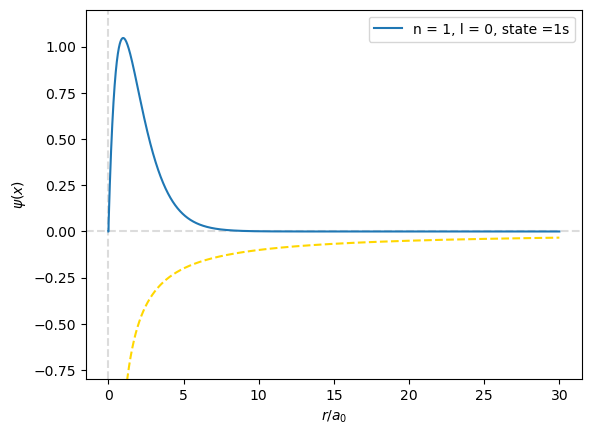

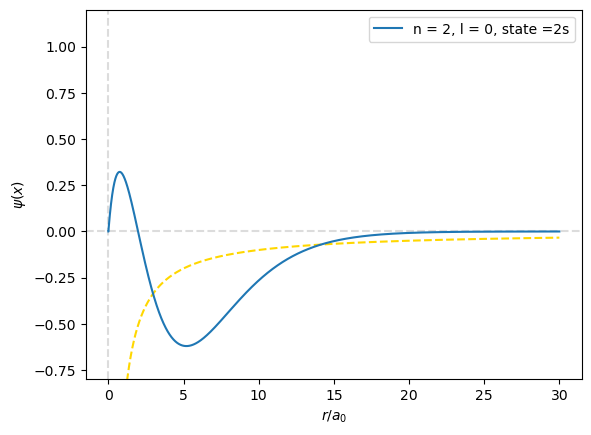

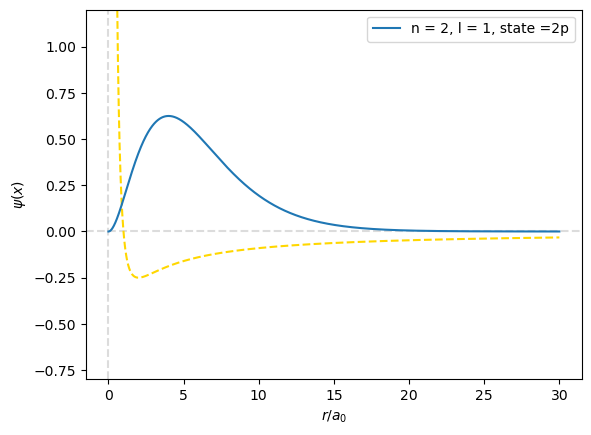

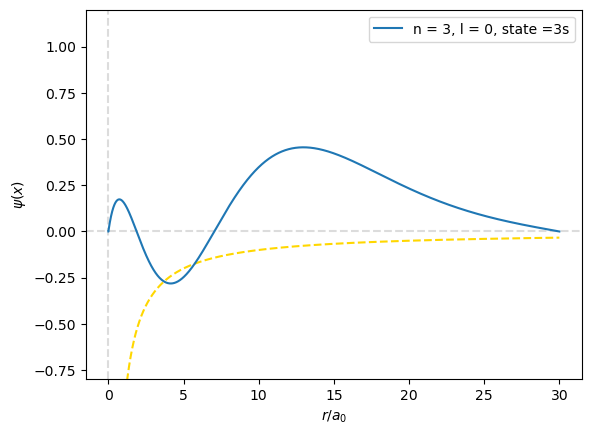

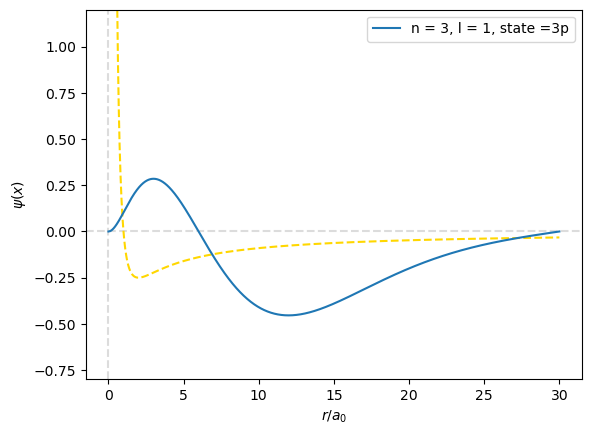

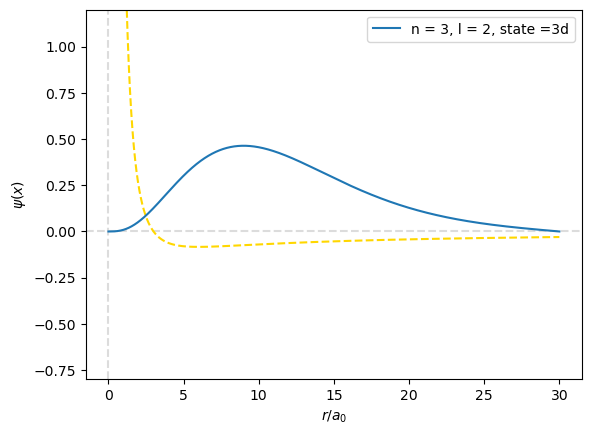

In [10]:
for n in n_values:
    for l in range(0, n+1):
        V = lambda r: V_eff(r, l)
        jc = []
        En = []
        for E in np.arange(-1, 0, 0.01):
            En.append(E)
            jc.append(juncCondn(E, V))
        
        jc = np.asarray(jc)
        En = np.asarray(En)
        
        idx = np.where(jc[:-1] * jc[1:] < 0)[0] + 1
        EigValues = np.zeros(len(idx))
         
        for j in range(len(idx)):
            a = En[idx[j]-1]
            b = En[idx[j]+1]
            EigValues[j] = bisect(lambda E: juncCondn(E, V), a, b)
            
        rL, rR, rm, dr = 1e-6, 30, 1e-3, 1./200
        
    
        for j in range(len(idx)):
            r1, wfup, r2, wfdn = solveTISE(EigValues[j], rL, rR, rm, dr, V)
            r = np.hstack((r1[:-1], np.flipud(r2[:-2])))
            psi = np.hstack((wfup[:-1], (-1)**(j+1) * np.flipud(wfdn[:-2])))
            norm = np.linalg.norm(psi)
            
            # Check the nodes condition
            if count_nodes(psi) == n - l - 1:
                plt.axhline(0, ls='--', c='gainsboro')
                plt.axvline(0, ls='--', c='gainsboro')
                plt.plot(r, V_eff(r, l), ls='--', c='Gold')
                plt.ylim(-0.8, 1.2)
                plt.xlabel('$r/a_0$')
                plt.ylabel('$\psi(x)$')
                plt.plot(r, 20 * psi / np.linalg.norm(psi), label=f'n = {n}, l = {l}, state ={n}{"s" if l == 0 else "p" if l == 1 else "d"}')
                plt.legend()
                plt.show()
                

### Exp:-
The number of nodes in a wavefunction is indeed related to the energy of the state, and for a one-dimensional system, the $k$-th excited state has $k$ nodes. However, for a three-dimensional system like the hydrogen atom, the situation is a bit more complex due to the presence of angular momentum.

In the hydrogen atom, the total number of nodes in the radial wavefunction $R(r)$ is given by $n - l - 1$, where $n$ is the principal quantum number and $l$ is the azimuthal quantum number. This means that for a given $n$, the number of nodes increases as $l$ decreases. 

For example, the 3d state (where $n=3$ and $l=2$) has $3 - 2 - 1 = 0$ nodes in the radial wavefunction. This might seem paradoxical if we were expecting the third excited state to have three nodes. However, it's important to remember that the nodes of the radial wavefunction correspond to regions where the electron cannot be found at a certain distance from the nucleus, but the electron can still be found at other angles. 

The total wavefunction for the hydrogen atom is $\Psi(r, \theta, \phi) = R(r)Y(\theta, \phi)$, where $Y(\theta, \phi)$ is the spherical harmonic function, which depends on the angular variables. The spherical harmonics have $l$ nodes, so the total number of nodes in the three-dimensional wavefunction is $n - 1$, which is consistent with our expectation that the $k$-th excited state should have $k$ nodes.

So, while the radial wavefunction for the 3d state has no nodes, the total wavefunction does have nodes due to the angular part. This is why it's not paradoxical for the 3d state to have no nodes in the radial wavefunction.


### Question:-
Next, consider the screened Coulomb potential (Yukawa potential),

$$V(r) = -\frac{Z e^{-r/a}}{r}$$

The parameter $a$ is the screening length. This potential behaves like the Coulomb potential when $r \rightarrow 0$ but has a much shorter range. Let $a = 20$ and $Z = 1$. Calculate and plot the energy-level diagram as Figure 9.11 above. Find the energy difference between 2s and 2p states. Is the number of bound states finite for the Yukawa potential? Double $Z = 2$, and repeat the calculation. Observe the difference with $Z = 1$.


Z, nodes, n, l, E= 1 0 1 0 -0.45088419342041
Z, nodes, n, l, E= 1 1 2 0 -0.08165996551513624
Z, nodes, n, l, E= 1 2 3 0 -0.019325080871581492
Z, nodes, n, l, E= 1 3 4 0 -0.003084739685058046
Z, nodes, n, l, E= 1 0 2 1 -0.08074083709716785
Z, nodes, n, l, E= 1 1 3 1 -0.018557884216308416
Z, nodes, n, l, E= 1 0 3 2 -0.016915563795301528
Z, nodes, n, l, E= 2 1 1 0 -0.4053652420043944
Z, nodes, n, l, E= 2 2 2 0 -0.13682758331298786
Z, nodes, n, l, E= 2 3 3 0 -0.049829933166503394
Z, nodes, n, l, E= 2 4 4 0 -0.01602960968017524
Z, nodes, n, l, E= 2 5 5 0 -0.003240318298339296
Z, nodes, n, l, E= 2 1 2 1 -0.13632065582275382
Z, nodes, n, l, E= 2 2 3 1 -0.0491792373657225
Z, nodes, n, l, E= 2 3 4 1 -0.015463981628417788
Z, nodes, n, l, E= 2 0 3 2 -0.1342924864027235
Z, nodes, n, l, E= 2 1 4 2 -0.04748180219862186
Z, nodes, n, l, E= 2 2 5 2 -0.014162573072645276
Z, nodes, n, l, E= 2 0 4 3 -0.04487284088134758
Z, nodes, n, l, E= 2 1 5 3 -0.012146553039550683


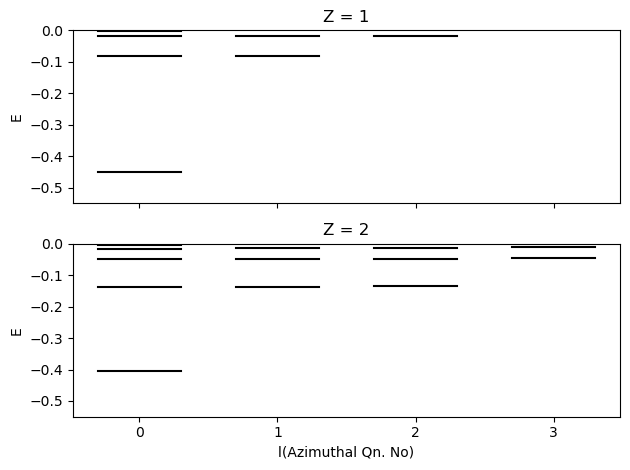

In [11]:
# Constants
xL, xR, N = 0., 120., 2200
h, mass = (xR-xL)/N, 1.0
Lmax, EL, M = 4, [], 100
Estart, dE = -0.5/np.arange(1, Lmax+1)**2-0.1, 0.001

def Veff(r, Z):
    alpha = 20 # 50,80  Incresing alphs no. of bound states increases
    return  -Z*np.exp(-r/alpha)/r +  L * (L + 1) / (2 * (r)**2)

def f(r, Z):
    return 2*mass*(E-Veff(r, Z))

def numerov(f, u, n, x, h, Z):
    nodes, c = 0, h*h/12.
    f0, f1 = 0., f(x+h, Z)
    for i in range(n):
        x += h
        f2 = f(x+h, Z)
        u.append((2*(1-5*c*f1)*u[i+1] - (1+c*f0)*u[i])/(1+c*f2))
        f0, f1 = f1, f2
        if (u[-1]*u[-2] < 0.0): nodes += 1
    return u, nodes

def shoot(En, Z):
    global E
    E, c, xm = En, (h*h)/6., xL + M*h
    wfup, nup = numerov(f, [0,.1], M, xL, h, Z)
    wfdn, ndn = numerov(f, [0,.1], N-M, xR, -h, Z)
    dup = ((1+c*f(xm+h, Z))*wfup[-1] - (1+c*f(xm-h, Z))*wfup[-3])/(h+h)
    ddn = ((1+c*f(xm+h, Z))*wfdn[-3] - (1+c*f(xm-h, Z))*wfdn[-1])/(h+h)
    return dup*wfdn[-2] - wfup[-2]*ddn

Z_values = [1, 2]
fig, axs = plt.subplots(len(Z_values), sharex=True, sharey=True)

for idx, Z in enumerate(Z_values):
    EL = []
    for L in range(Lmax):
        n, E1, Ea = L+1, Estart[L], []
        while (E1 < -4*dE):
            E1 += dE
            if (shoot(E1, Z)*shoot(E1 + dE, Z) > 0): continue
            E = bisect(shoot, E1, E1 + dE, xtol=1.e-8, args=(Z,))
            Ea.append(E)
            wfup, nup = numerov(f, [0,.1], M-1, xL, h, Z)
            wfdn, ndn = numerov(f, [0,.1], N-M-1, xR, -h, Z)
            psix = np.concatenate((wfup[:-1], wfdn[::-1]))
            psix[M:] *= wfup[-1]/wfdn[-1]
            print('Z, nodes, n, l, E=', Z, nup+ndn, n, L, E)
            n += 1
        EL.append(Ea)

    for L in range(Lmax):
        for i in range(len(EL[L])):
            axs[idx].plot([L-.3, L+.3], [EL[L][i]]*2, 'k-')
    axs[idx].set_title('Z = {}'.format(Z))
    axs[idx].set_ylabel('E')

plt.xlabel('l(Azimuthal Qn. No)')
plt.ylim(-.55, 0)
plt.xticks(range(Lmax))
plt.tight_layout()
plt.show()


### Exp:-
Yukawa potential takes the form: ($V = -Z \frac{e^{-r/\alpha}}{r}$), where:
- (Z) represents the strength of the interaction.
- ($\alpha$) determines the range of the potential.
- ($r$) is the distance between the interacting particles

The number of bound states depends on the screening parameter ($\alpha$).

From above Energy values that we get we have 
- E for 2s state (2, 0) = -0.08165996551513624 
- E for 2p state (2 ,1) = -0.08074083709716785
- |$\Delta E$| = 0.0009191284179683873

Hence there is very small difference between two sublevels 2s and 2p

For changing values of Z we observed that for increasing Z (Interation constant represent strength of potential) as well as $\alpha$ (range of the interaction) the number of bound states inceases. 

The no. of Bound state for hydrogen depend on the the interaction constant Z and the range $\alpha$. For $\frac{1}{\alpha}$ = 0 it will become equal to Coulamb potential and have infinite bound states for other values it will have different no. of bound state. The Sobolev inequality states that whenever (C/α)< 1.65, no bound state occurs. Here, C is a constant related to the strength of the interaction.

### Question:-
Write a program to compute the expectation values of kinetic and potential energies, respectively. Remember to normalize your wave function properly. Test your program on a hydrogen atom to ensure it gives the correct results according to the virial theorem:

$$
\langle T \rangle = -\frac{1}{2}\langle V \rangle
$$

For calculating, you should use the first derivative formula given in Equation 9.60, which has a very high accuracy of $(O(h^4)\$.


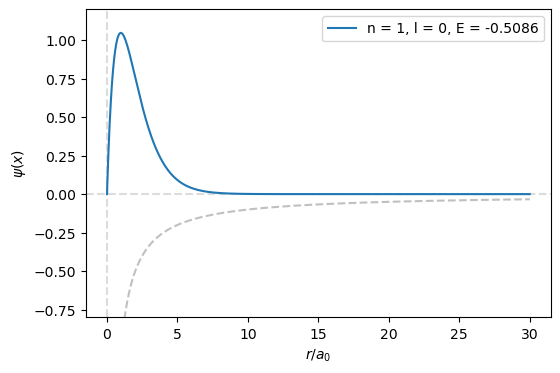

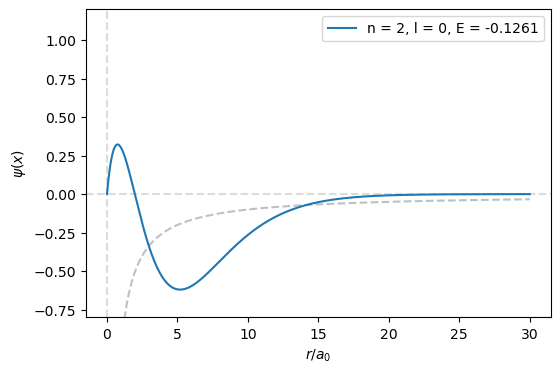

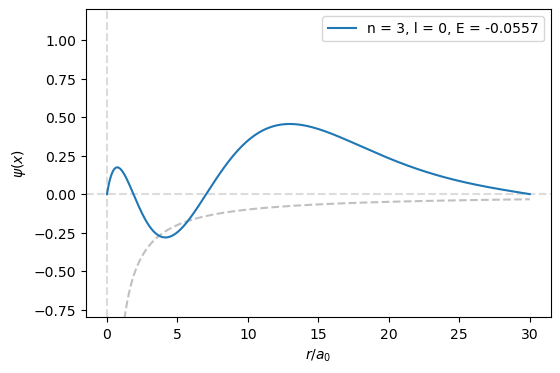

In [12]:
# Define the effective potential function
def V_eff(r, l):
    return (-1 / r ) + l * (l + 1) / (2 * (r)**2)

# Define the function f for the Numerov method
def f(r, E, V):
    return 2*(E - V(r))

# Define the Numerov method
def numerov1(f, r, dr, E, V):
    psi = np.zeros(len(r))
    psi[0], psi[1] = 0., dr
    
    c = dr*dr/12
    f0, f1 = f(r[0], E, V), f(r[1], E, V)
    for i in range(len(r)-2):   
        f2 = f(r[i+2], E, V)
        psi[i+2] = (2.*psi[i+1]*(1 - 5*c*f1) - psi[i]*(1 + c*f0))/(1 + c*f2)
        f0, f1 = f1, f2

    return psi

# Define the function to solve the TISE
def solveTISE(En, rL, rR, rm, dr, V):
    E = En
    
    # Left solution
    r1 = np.round(np.arange(rL, rm + 2*dr, dr), 10)
    wfup = numerov1(f, r1, dr, E, V)

    # Right solution
    r2 = np.flipud(np.round(np.arange(rm-dr, rR+dr, dr), 12))
    wfdn = numerov1(f, r2, -dr, E, V)

    return r1, wfup, r2, wfdn

# Define the junction condition
def juncCondn(En, V):
    rL = 1e-6
    rR = 30
    rm = 1e-3
    dr = 1./200

    E = En

    r1, wfup, r2, wfdn = solveTISE(E, rL, rR, rm, dr, V)

    # Left and Right derivatives at x=xm using Eqn. 9.60 of Wang's book
    c = dr*dr/6
    dUp = ((1 + c*f(rm+dr, E, V))*wfup[-1] - (1 + c*f(rm-dr, E, V))*wfup[-3]) /(2.*dr)
    dDn = ((1 + c*f(rm+dr, E, V))*wfdn[-3] - (1 + c*f(rm-dr, E, V))*wfdn[-1]) /(2.*dr)

    return (dUp*wfdn[-2] - dDn*wfup[-2])


# Define a function to count the nodes
def count_nodes(psi):
    return np.sum(psi[:-1] * psi[1:] < 0)

# Define the quantum numbers n and l
n_values = [1, 2, 3]
l_values = [0]

wavefunction = {}
for n in n_values:
    for l in l_values:
        V = lambda r: V_eff(r, l)
        jc = []
        En = []
        for E in (np.arange(-1, 0, .01)):
            En.append(E)
            jc.append(juncCondn(E, V))
        
        jc = np.asarray(jc)
        En = np.asarray(En)
        
        idx = np.where(jc[:-1] * jc[1:] < 0)[0] + 1
        EigValues = np.zeros(len(idx))
         
        for j in range(len(idx)):
            a = En[idx[j]-1]
            b = En[idx[j]+1]
            EigValues[j] = bisect(lambda E: juncCondn(E, V), a, b)
            
        rL, rR, rm, dr = 1e-6, 30, 1e-3, 1./200

        for j in range(len(idx)):
            r1, wfup, r2, wfdn = solveTISE(EigValues[j], rL, rR, rm, dr, V)
            r = np.hstack((r1[:-1], np.flipud(r2[:-2])))
            psi = np.hstack((wfup[:-1], (-1)**(j+1) * np.flipud(wfdn[:-2])))
            norm = np.linalg.norm(psi)
            psi = psi/np.linalg.norm(psi)
            
            # Check the nodes condition
            if count_nodes(psi) == n - l - 1:
                wavefunction[n] = psi
                plt.subplots(1,1, figsize=(6,4))
                plt.axhline(0, ls='--', c='gainsboro')
                plt.axvline(0, ls='--', c='gainsboro')
                plt.xlabel('$r/a_0$')
                plt.ylabel('$\psi(x)$')
                plt.plot(r,V_eff(r, l) ,ls='--', c='silver')
                plt.ylim(-0.8,1.2)
                plt.plot(r, 20*psi/np.linalg.norm(psi), label='n = %d, l = %d, E = %.4f'%(n, l, EigValues[j]))
                plt.legend()
                plt.show()


### Exp:-
We have Plotted th graphs for n =1,2,3 having each l = 0 . This condition corrosponds to the Coulamb potential as for l = 0 the centrifugal force term becomes Zero. 

The virial theorem states that for the system interacting via a Coulomb potential follows as relation between KE and PE as:

$$\langle T \rangle = -\langle \frac{V}{2} \rangle,$$

where:
- $\langle T \rangle$ is the Expected kinetic energy
- $\langle V \rangle$ is the Expected potential energy 


In [13]:
psi1 = wavefunction[1]
psi2 = wavefunction[2]
psi3 = wavefunction[3]
psi_list = [psi1,psi2,psi3]

N = len(psi)
rL = 1e-6  
rR = 30    
rm = 1e-3  
dr = 1./200

# Construct the tridiagonal matrix for KE
T = np.zeros((N, N))
for i in range(N):
    T[i, i] = -2 / dr**2
    if i > 0:
        T[i, i - 1] = 1 / dr**2
    if i < N - 1:
        T[i, i + 1] = 1 / dr**2

# Calculate potential energy operator
V = -1/r  
P = np.diag(V)

# Calculate kinetic energy operator
K = (-1 / (2)) * T

# Hamiltonian
H = (-1 / 2) * T + P

# Loop over psi_list
for i, psi in enumerate(psi_list):
    n = i + 1   
    l = 0    

    # Calculate kinetic energy
    KE = np.dot(psi.T, np.dot(K, psi))
    print(f"For n = {n}, l = {l}:")
    print(f"Expected Kinetic Energy: {KE:.6f}")

    # Calculate potential energy
    PE = np.dot(psi.T, np.dot(P, psi))
    print(f"Expected Potential Energy: {PE:.6f}")

    # Calculate total energy
    TE = np.dot(psi.T, np.dot(H, psi))
    print(f"Expected Total Energy: {TE:.6f}")
    

For n = 1, l = 0:
Expected Kinetic Energy: 0.539927
Expected Potential Energy: -1.025888
Expected Total Energy: -0.485960
For n = 2, l = 0:
Expected Kinetic Energy: 0.129929
Expected Potential Energy: -0.253206
Expected Total Energy: -0.123277
For n = 3, l = 0:
Expected Kinetic Energy: 0.058459
Expected Potential Energy: -0.113406
Expected Total Energy: -0.054947


From the above Calculated expectation values we can say that the Expected Kinetic Energy is half of the negative of Expected Potential Energy

Ex:
- For n = 1, l = 0:
- Expected Kinetic Energy: 0.539927
- Expected Potential Energy: -1.025888
- Expected Total Energy: -0.485960

- And both are related as  0.539927 $ \approx$ - $\frac{1}{2}$(-1.025888)

Which meets the condition as we expected 

$$\langle T \rangle = -\langle \frac{V}{2} \rangle,$$
Similary above printed values for n=2 ,3 also follows Virial Theorem

Hence all the states having l =0 (Pure Coulambic Case will follow the Virial theorem )


### Question :-
From your code, demonstrate that the size of the Hydrogen atom scales as $n^2$ . Describe your approach.

### Exp:-
We will be using the expression for Energy of the nth energy level for Hydrogen Atom:

$E_n=-\frac{m}{2\hbar^2}\left(\frac{e^2}{4\pi \epsilon_0 }\right)^2\frac{1}{n^2}$

Virial Theorem states that for stationary states,
$2\left<T\right>=\left<x\frac{\partial V}{\partial x}\right>$

For Hydrogen, $V=-\frac{e^2}{4\pi \epsilon_0 r}$

For 3-dimensions Virial Theorem can be written as:
$2\left<T\right>=\left<r\frac{\partial V}{\partial r}\right>$

Plugging the value of $V$ in the above equation, we get

$\implies 2\left<T\right>= \frac{e^2}{4\pi \epsilon_0 r}$

$\implies 2\left<T\right>= -\left<V\right>$

We know, $E_n=\left<T\right>+\left<V\right>$

$\implies E_n=-\frac{\left<V\right>}{2} + \left<V\right>$

$\implies E_n=\frac{\left<V\right>}{2}$

Now plugging the expression of Energy for Hydrogen in the above equation, we get

$\implies -\frac{m}{2\hbar^2}\left(\frac{e^2}{4\pi \epsilon_0 }\right)^2\frac{1}{n^2}=\frac{\left<V\right>}{2}$

$\implies \left<V\right> = -\frac{m}{\hbar^2}\left(\frac{e^2}{4\pi \epsilon_0 }\right)^2\frac{1}{n^2}$

$\implies -\frac{e^2}{4\pi \epsilon_0} \left<\frac{1}{r}\right>=  -\frac{m}{\hbar^2}\left(\frac{e^2}{4\pi \epsilon_0 }\right)^2\frac{1}{n^2}$

$\implies \left<\frac{1}{r}\right>=  \frac{m}{\hbar^2}\frac{e^2}{4\pi \epsilon_0 }\frac{1}{n^2}$

This is the expectation value of $\frac{1}{r}$ for Hydrogen.

You can simplify it further by writing in terms of the Bohr’s radius $a_0$,

$a_0= \frac{4\pi \epsilon_0 \hbar^2}{m e^2}$

Using the above expression, one can write $\left<\frac{1}{r}\right>$ as

$\left<\frac{1}{r}\right> = \frac{1}{n^2 a_0}$

For n = 1 and for  $a_0$  = 1(Bohr atomic radius in atomic scale) 

we will get $\left<\frac{1}{r}\right>$ = 1

Now using above concept we calulate the expectation value of $\frac{1}{r}$ using the Matrix Operation and check that the numerical values matches the anyalytical expectations 


In [14]:
psi1 = wavefunction[1] # n =1 and l =0
psi2 = wavefunction[2] # n= 2 and l =0
psi3 = wavefunction[3] # n =3 and l =0
psi_list = [psi1,psi2,psi3]

r = np.hstack((r1[:-1], np.flipud(r2[:-2])))
R = np.diag(1/r)

# Loop over psi_list
for i, psi in enumerate(psi_list):
    n = i + 1   
    l = 0    

    # Calculate total energy
    EV_r = np.dot(psi.T, np.dot(R, psi))
    print(f"Expected value of r: {EV_r:.6f}")
    


Expected value of r: 1.025888
Expected value of r: 0.253206
Expected value of r: 0.113406


we got 

- for $n^2$ = 1   we got  $\left<\frac{1}{r}\right>$  : 1.025888 
- for $n^2$ = 4   we got  $\left<\frac{1}{r}\right>$  : 0.253206 
- for $n^2$ = 9   we got  $\left<\frac{1}{r}\right>$  : 0.112058

which matches to our analytical results.

$\left<\frac{1}{r}\right> = \frac{1}{n^2 a_0}$ .

So $\left<r\right>$ is proportional to $n^2$ .


Another method to show is simply finding expactation value of r and for ground state that is $ 1.5a_0$ and for First and second excites states it will simply follow the rule of $\left<r\right>$ =  $ 1.5a_0n^2$ where $a_0$ = 1

### Question:-
For the circular state $(n, l) = (4, 3)$, plot the probability density distribution $|u_{nl}Y_{lm}|^2$ in the $x - z$ plane as shown in Figure 9.14 of the textbook. Spherical harmonic functions are available in the `scipy` package - check out the documentation of the `scipy.special.sph_harm` function.

### Sol:-

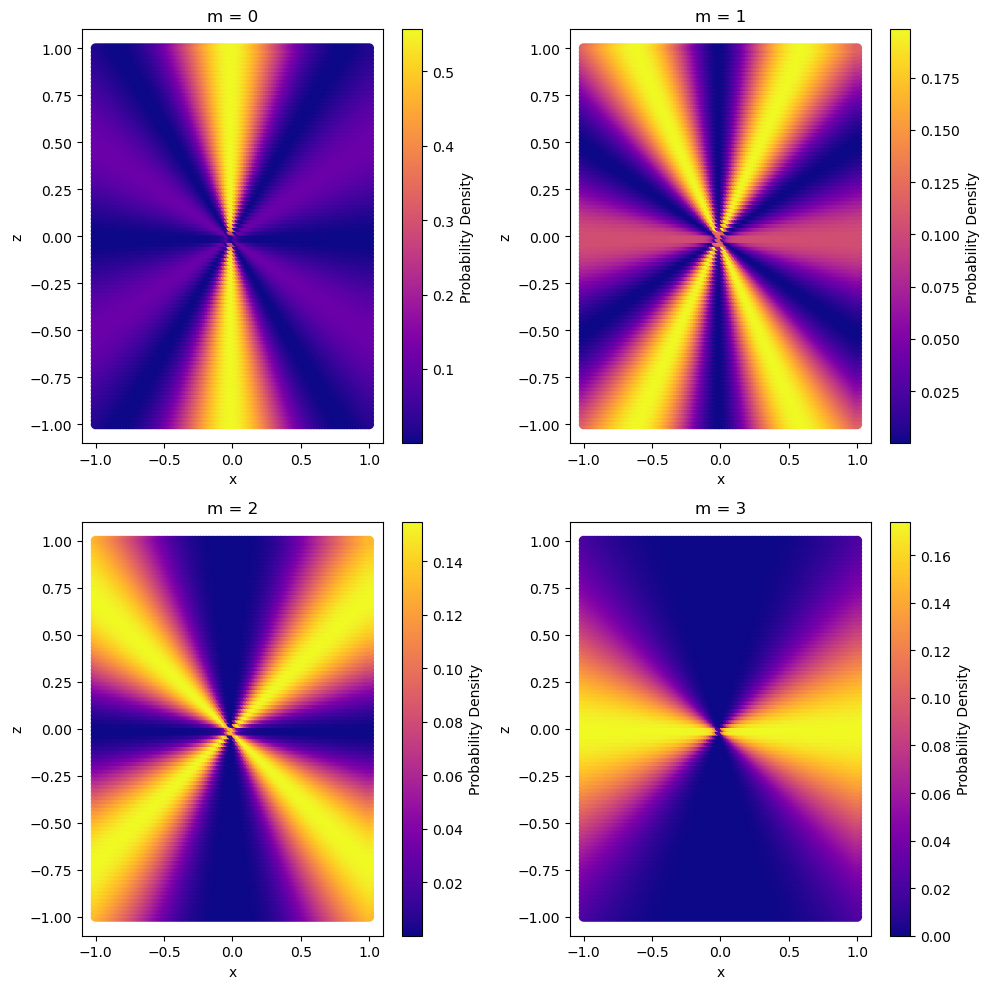

In [15]:
from scipy.special import sph_harm

# Define parameters
n = 4
l = 3
m_values = [0, 1, 2, 3]

# Generate meshgrid for angles
x = np.linspace(-1, 1, 100)
z = np.linspace(-1, 1, 100)
x, z = np.meshgrid(x, z)  # Swap x and z for z-x plane

# Initialize figure
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Plot probability density distribution for each m value
for i, m in enumerate(m_values):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Compute spherical harmonics for the given m value
    Y_lm = sph_harm(m, l, 0, np.arctan2(x, z))  
    
    probability_density = np.abs(Y_lm)**2  # Placeholder
    
    # Plot probability density distribution
    sc = ax.scatter(x, z, c=probability_density, cmap='plasma')
    ax.set_title(f'm = {m}')
    ax.set_xlabel('x')
    ax.set_ylabel('z')
    fig.colorbar(sc, ax=ax, label='Probability Density')

plt.tight_layout()
plt.show()


### Question:- 
For the Yukawa potential given above, compute < T > and < V > for the lowest state in each l -series. Do they still obey the virial theorem? Comment on your results.

In [16]:
# Define the effective potential for yukawaha 
def V_eff(r, l):
    alpha = 20
    Z = 1
    return -Z*np.exp(-r/alpha)/r + l * (l + 1) / (2 * (r)**2)

# Define the function f for the Numerov method
def f(r, E, V):
    return 2*(E - V(r))

# Define the Numerov method
def numerov1(f, r, dr, E, V):
    psi = np.zeros(len(r))
    psi[0], psi[1] = 0., dr
    
    c = dr*dr/12
    f0, f1 = f(r[0], E, V), f(r[1], E, V)
    for i in range(len(r)-2):   
        f2 = f(r[i+2], E, V)
        psi[i+2] = (2.*psi[i+1]*(1 - 5*c*f1) - psi[i]*(1 + c*f0))/(1 + c*f2)
        f0, f1 = f1, f2

    return psi

# Define the function to solve the TISE
def solveTISE(En, rL, rR, rm, dr, V):
    E = En
    
    # Left solution
    r1 = np.round(np.arange(rL, rm + 2*dr, dr), 10)
    wfup = numerov1(f, r1, dr, E, V)

    # Right solution
    r2 = np.flipud(np.round(np.arange(rm-dr, rR+dr, dr), 12))
    wfdn = numerov1(f, r2, -dr, E, V)

    return r1, wfup, r2, wfdn

# Define the junction condition
def juncCondn(En, V):
    rL = 1e-6
    rR = 30
    rm = 1e-3
    dr = 1./200

    E = En

    r1, wfup, r2, wfdn = solveTISE(E, rL, rR, rm, dr, V)

    # Left and Right derivatives at x=xm using Eqn. 9.60 of Wang's book
    c = dr*dr/6
    dUp = ((1 + c*f(rm+dr, E, V))*wfup[-1] - (1 + c*f(rm-dr, E, V))*wfup[-3]) /(2.*dr)
    dDn = ((1 + c*f(rm+dr, E, V))*wfdn[-3] - (1 + c*f(rm-dr, E, V))*wfdn[-1]) /(2.*dr)

    return (dUp*wfdn[-2] - dDn*wfup[-2])


# Define a function to count the nodes
def count_nodes(psi):
    return np.sum(psi[:-1] * psi[1:] < 0)

# Define the quantum numbers n and l
n_values = [1, 2, 3]
l_values = [0]

wavefunction = {}
for n in n_values:
    for l in l_values:
        V = lambda r: V_eff(r, l)
        jc = []
        En = []
        for E in (np.arange(-1, 0, .01)):
            En.append(E)
            jc.append(juncCondn(E, V))
        
        jc = np.asarray(jc)
        En = np.asarray(En)
        
        idx = np.where(jc[:-1] * jc[1:] < 0)[0] + 1
        EigValues = np.zeros(len(idx))
         
        for j in range(len(idx)):
            a = En[idx[j]-1]
            if idx[j] < len(En) - 1:  # Check if idx[j] is not the last index
                b = En[idx[j]+1]
            else:
                b = En[idx[j]]  # Use the last element if idx[j] is the last index
                
            EigValues[j] = bisect(lambda E: juncCondn(E, V), a, b)
            
        rL, rR, rm, dr = 1e-6, 30, 1e-3, 1./200

        for j in range(len(idx)):
            r1, wfup, r2, wfdn = solveTISE(EigValues[j], rL, rR, rm, dr, V)
            r = np.hstack((r1[:-1], np.flipud(r2[:-2])))
            psi = np.hstack((wfup[:-1], (-1)**(j+1) * np.flipud(wfdn[:-2])))
            norm = np.linalg.norm(psi)
            psi = psi/np.linalg.norm(psi)
            # Check the nodes condition
            if count_nodes(psi) == n - l - 1:
                wavefunction[n] = psi
                
psi1 = wavefunction[1]
psi2 = wavefunction[2]
psi3 = wavefunction[3]

psi_list = [psi1,psi2,psi3]

N = len(psi)

# Construct the tridiagonal matrix for KE
T = np.zeros((N, N))
for i in range(N):
    T[i, i] = -2 / dr**2
    if i > 0:
        T[i, i - 1] = 1 / dr**2
    if i < N - 1:
        T[i, i + 1] = 1 / dr**2

# Calculate potential energy operator
V = (-1*np.exp(-r/20))/r
P = np.diag(V)

# Calculate kinetic energy operator
K = (-1 / (2)) * T

# Hamiltonian
H = (-1 / 2) * T + P

# Loop over psi_list
for i, psi in enumerate(psi_list):
    n = i + 1   
    l = 0    

    # Calculate kinetic energy
    KE = np.dot(psi.T, np.dot(K, psi))
    print(f"For n = {n}, l = {l}:")
    print(f"Expected Kinetic Energy: {KE:.6f}")

    # Calculate potential energy
    PE = np.dot(psi.T, np.dot(P, psi))
    print(f"Expected Potential Energy: {PE:.6f}")

    # Calculate total energy
    TE = np.dot(psi.T, np.dot(H, psi))
    print(f"Expected Total Energy: {TE:.6f}")

For n = 1, l = 0:
Expected Kinetic Energy: 0.538087
Expected Potential Energy: -0.975911
Expected Total Energy: -0.437824
For n = 2, l = 0:
Expected Kinetic Energy: 0.123628
Expected Potential Energy: -0.203760
Expected Total Energy: -0.080132
For n = 3, l = 0:
Expected Kinetic Energy: 0.049145
Expected Potential Energy: -0.067731
Expected Total Energy: -0.018586


### Exp:
In the above case as $\alpha$ is equal to 20 which is large enough to vanish the effect of exponential effect for small r (1s state ) as r increses exponential term  start to give its effect(for 2s and 3s and other higher states ) and the viral theorem becomes fails to follow. For other sublevels p,d,f centrifugal term will participate which does not obeys the virial theorem 

Hence For 1s virial theorem will follow upto some extent and for rest of higher states it will not follow. It's nature depends on Z and $\alpha$ , it does not always follows the virial theorem.
